In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data = pd.read_csv('KIS_KIS.csv')
print('총 샘플의 수 :', len(data))

총 샘플의 수 : 122768


In [ ]:
# data check
data[:5]

,2020,01,01.1,090100,***********,***********.1,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 박양주 올림
0,2020,1,1,90100,***********,***********,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...
1,2020,1,1,90200,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
2,2020,1,1,90200,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
3,2020,1,1,94500,***********,***********,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...
4,2020,1,1,94600,***********,***********,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...


In [ ]:
del data['2020']
del data['01']
del data['01.1']
del data['090100']
del data['***********']
del data['***********.1'] # Text 제외 모든 값 제거
data.columns = ['Text'] # Text 의 Title 추가
data.insert(0, 'Spam', 'spam') # Spam 구분값 추가
data['Spam'] = data['Spam'].replace(['spam'],[1]) # Spam 을 숫자 1 로 교체
data[:5]

,Spam,Text
0,1,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...
1,1,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
2,1,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
3,1,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...
4,1,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122768 entries, 0 to 122767
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Spam    122768 non-null  int64 
 1   Text    122768 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
print('결측값 여부 :', data.isnull().values.any()) # Null 값이 있는지 check

결측값 여부 : False


In [ ]:
print('Text 열의 유니크한 값 :', data['Text'].nunique()) # 다른 Text 와 안 겹치는 갯수

Text 열의 유니크한 값 : 12554


In [ ]:
# Text 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['Text'], inplace=True)
print('총 샘플의 수 :', len(data))

총 샘플의 수 : 12554


In [ ]:
data[:5]

,Spam,Text
0,1,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...
1,1,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
3,1,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...
5,1,덕진구민여러분 사랑합니다.새해 가족모두 행복하십시오 정동영올림hxxps://bit....
13,1,2020년 새해에 건강하시고 행복가득한 한 해가 되시기를 기원합니다. 가물치와호박건...


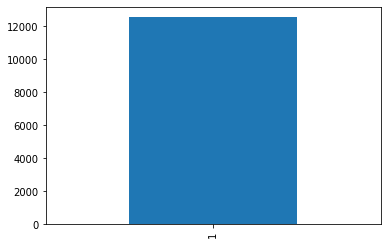

In [ ]:
data['Spam'].value_counts().plot(kind='bar') # Spam 비율 (현재는 아무것도 없음)

In [ ]:
print('정상 메일과 스팸 메일의 개수')
print(data.groupby('Spam').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
   Spam  count
0     1  12554


In [ ]:
print(f'정상 메일의 비율 = {round(data["Spam"].value_counts()/len(data) * 100, 3)}%') # Spam 비율
# print(f'스팸 메일의 비율 = {round(data["Spam"].value_counts()/len(data) * 100, 3)}%')

KeyError: ignored

In [ ]:
X_data = data['Text'] # Text 저장
y_data = data['Spam'] # Label 저장
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 12554
레이블의 개수: 12554


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data) # 데이터를 Train , Test 용으로 분리.

In [ ]:
print('-------훈련 데이터의 비율-------')
print(f'정상 메일 = {round(y_train.value_counts()/len(y_train) * 100, 3)}%')
# print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100, 3)}%')

-------훈련 데이터의 비율-------
정상 메일 = 1    100.0
Name: Spam, dtype: float64%


In [ ]:
print('-------테스트 데이터의 비율-------')
print(f'정상 메일 = {round(y_test.value_counts()/len(y_test) * 100, 3)}%')
# print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100, 3)}%')

-------테스트 데이터의 비율-------
정상 메일 = 1    100.0
Name: Spam, dtype: float64%


In [ ]:
# 단어 분리기 모듈 설치
!pip install soynlp

from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

     |████████████████████████████████| 416 kB 5.1 MB/s 


In [ ]:
word_extractor = WordExtractor()
word_extractor.train(X_train) # Train 그룹의 Text 를 단어로 분리하기 위한 훈련
word_score_table = word_extractor.extract()

training was done. used memory 0.952 Gb
all cohesion probabilities was computed. # words = 26976
all branching entropies was computed # words = 61572
all accessor variety was computed # words = 61572


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[1, 18, 3219, 663, 749, 3220, 143, 436, 179, 53, 4320, 371, 4321, 255, 3893, 5813, 33, 1406, 4929, 3504, 7274, 474, 1005, 5814, 1006, 3894, 5815, 11, 61, 366, 707, 231, 9986], [16543, 7275, 7276, 7277], [2, 9987, 9988, 9989, 5816, 36, 180, 9990, 9991], [2, 16544, 3895, 16545, 16546, 16547, 10], [1, 804, 216, 2690, 7278, 127, 2031, 719, 151, 541, 3221, 9992, 736, 357, 3896, 2322, 78, 844, 4, 43, 7, 2147, 647, 7279, 4322, 5, 120, 2950, 118, 7, 2472, 2691, 120, 5, 17, 37, 25, 2951, 32, 490, 135, 104, 59, 55, 475, 7280, 113, 1238, 3897, 912, 338, 9, 142, 8, 161, 181, 7281, 1040, 7282, 7283, 85, 51, 74, 4, 376, 85, 51, 74, 4, 145, 13, 56, 24, 42, 35, 50, 171, 314, 41, 189, 107, 62, 6, 566, 569, 68, 491, 32, 476, 190, 527, 590, 184, 70, 105, 100, 68, 11, 28, 98, 122, 88, 58]]


In [ ]:
word_to_index = tokenizer.word_index # 숫자로 index 화
print(word_to_index)

{'광고': 1, 'web발신': 2, '및': 3, '바랍니다': 4, '2': 5, '있습니다': 6, '1': 7, '가능': 8, '상품': 9, '무료거부': 10, '아래': 11, '등': 12, '본': 13, '한도': 14, '00': 15, '최대': 16, '5': 17, '안녕하세요': 18, '2020년': 19, '8': 20, '또는': 21, '안내드립니다': 22, '거절': 23, '전화': 24, '9': 25, '무조건': 26, '3': 27, '번호로': 28, '수수료': 29, '함께': 30, '후': 31, '따라': 32, '항상': 33, '금리': 34, '1번': 35, '수': 36, '7': 37, 'kr': 38, '진행': 39, 'ly': 40, '접수자가': 41, '하셔서': 42, '상품내용': 43, '신청': 44, '18': 45, '확인': 46, '이상': 47, '6': 48, '금전': 49, '누르시면': 50, '많으니': 51, '기존': 52, '고객님의': 53, '대출': 54, '발생하는': 55, '문자수신번호로': 56, '직접': 57, '무료수신거부': 58, '별도': 59, '최근': 60, '내용을': 61, '지연될수': 62, '만': 63, 'bit': 64, '가능합니다': 65, '대상': 66, 'hxxps': 67, '경우에는': 68, 'com': 69, '수신을': 70, '상담': 71, '직장인': 72, '통해': 73, '빠른신청': 74, '30': 75, '앱': 76, '오전': 77, '많은': 78, '안내': 79, '상품은': 80, '오후': 81, '접수': 82, '자금을': 83, '요구하는': 84, '신청자가': 85, '사칭': 86, '마감': 87, '하겠습니다': 88, '있는': 89, '5년': 90, '연금리': 91, 'gl': 92, '기간': 93, '상': 94, '더': 95, '드립니다

In [ ]:
threshold = 2
total_cnt = len(word_to_index) #  단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold 보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold 보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합(vocabulary)에서 희귀 단어의 비율:', (rare_cnt / total_cnt) * 100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq / total_freq) * 100)

등장 빈도가 1번 이하인 희귀 단어의 수: 25942
단어 집합(vocabulary)에서 희귀 단어의 비율: 61.06298841916957
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.665274340358003


In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size))) # 정리한 후의 단어 종류 갯수

단어 집합의 크기: 42485


메일의 최대 길이 : 319
메일의 평균 길이 : 24.219655


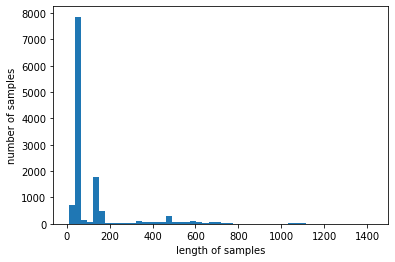

In [ ]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 25 # Text의 최대 길이
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print('훈련 데이터의 크기 (shape):', X_train_padded.shape)

훈련 데이터의 크기 (shape): (10043, 25)


In [ ]:
# 훈련 model 생성 및 훈련
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
126/126 [==============================] - 3s 15ms/step - loss: 0.0360 - acc: 0.9975 - val_loss: 6.4340e-04 - val_acc: 1.0000
Epoch 2/4
126/126 [==============================] - 2s 13ms/step - loss: 1.6178e-04 - acc: 1.0000 - val_loss: 1.6998e-05 - val_acc: 1.0000
Epoch 3/4
126/126 [==============================] - 2s 14ms/step - loss: 5.2648e-06 - acc: 1.0000 - val_loss: 8.0372e-07 - val_acc: 1.0000
Epoch 4/4
126/126 [==============================] - 2s 14ms/step - loss: 2.8607e-07 - acc: 1.0000 - val_loss: 7.8467e-08 - val_acc: 1.0000


In [ ]:
# Test 데이터로 확인
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

79/79 [==============================] - 0s 3ms/step - loss: 7.8460e-08 - acc: 1.0000

 테스트 정확도: 1.0000


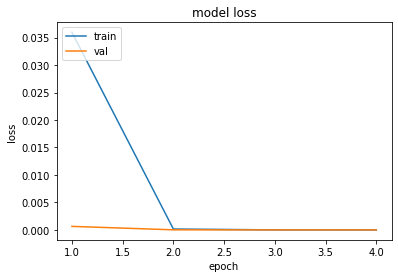

In [ ]:
# 그래프로 설명
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()